# 1.0 - IMPORTS

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pickle #salvar modelo
import graphviz
import skfuzzy
import seaborn as sns
import colorsys
from pylab import pcolor, colorbar, plot

from sklearn.preprocessing import Imputer                            #tratar valores missing
from sklearn.model_selection import train_test_split                 #MANIPULAÇÃO DOS DADOS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder        #MANIPULAÇÃO DOS DADOS

from sklearn.naive_bayes import GaussianNB                           #MODELOS
from sklearn.ensemble import RandomForestClassifier                  #MODELOS
from sklearn.linear_model import LogisticRegression                  #MODELOS
from sklearn.neighbors import KNeighborsClassifier                   #MODELOS
from sklearn.tree import DecisionTreeClassifier                      #MODELOS
from sklearn.tree import export_graphviz                             #MODELOS
from sklearn.svm import SVC                                          #MODELOS
from sklearn.cluster import KMeans                                   #MODELOS
from pyclustering.cluster.kmedoids import kmedoids                   #MODELOS
from pyclustering.cluster import cluster_visualizer                  #MODELOS
from apyori import apriori                                           #MODELOS
from minisom import MiniSom                                          #MODELOS

from sklearn.metrics import confusion_matrix, accuracy_score         #AVALIAÇÃO
from yellowbrick.classifier import ConfusionMatrix                   #AVALIAÇÃO
from sklearn import metrics                                          #AVALIAÇÃO

In [11]:
import tensorflow as tf
#print(tf.VERSION)
print(tf.keras.__version__)

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.layers import LSTM   #RNN

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

from keras.layers.normalization import BatchNormalization               #NORMALIZAÇÃO das concoluções
from sklearn.preprocessing import MinMaxScaler                          #NORMALIZAÇÃO de dados

from sklearn.model_selection import StratifiedKFold #validação cruzada

2.2.4-tf


Using TensorFlow backend.


# 2.0  - COLETAS DE DADOS

## 2.1 - Ler Arquivos CSV

In [42]:
base1 = pd.read_csv('Dados/iris.csv')
base2 = pd.read_csv('Dados/Eleicao.csv', sep=';')
base3 = pd.read_csv('Dados/AirPassengers.csv')
base4 = pd.read_csv("Dados/Dados-Pesquisa.csv", sep = ',', low_memory=False)
base5 = pd.read_csv("Dados/pima-data.csv")
base6 = pd.read_csv("Dados/Credit.csv")
base7 = pd.read_csv("Dados/trees.csv")
base8 = pd.read_csv('Dados/petr4-treinamento.csv')

## 2.2 - Ler Arquivos TXT

In [ ]:
base20 = pd.read_csv('Dados/transacoes.txt', header = None)


## 2.3 - Ler Dados pelo Banco de Dados

In [ ]:
import psycopg2 #postgre
from pymongo import MongoClient

### POSTGRE

In [2]:
conexao = psycopg2.connect(host="localhost",database="CD", user="postgres", password="p6nglwc10", port=5432)
conexao

<connection object at 0x000001944C0F5048; dsn: 'user=postgres password=xxx dbname=CD host=localhost port=5432', closed: 0>

In [3]:
cursor = conexao.cursor()
cursor

<cursor object at 0x000001944E6CDC88; closed: 0>

In [5]:
consulta = "select * from clientes"
consulta

'select * from clientes'

In [6]:
cursor.execute(consulta)

In [7]:
registros = cursor.fetchall() 
registros

[(1, 'Adelina Buenaventura', 'RJ', 'M', 'Silver'),
 (2, 'Adelino Gago', 'RJ', 'M', 'Silver'),
 (3, 'Adélio Lisboa', 'SE', 'M', 'Silver'),
 (4, 'Adérito Bahía', 'MA', 'M', 'Silver'),
 (5, 'Adolfo Patrício', 'PE', 'M', 'Silver'),
 (6, 'Adriana Guedelha', 'RO', 'F', 'Platinum'),
 (7, 'Aida Dorneles', 'RN', 'F', 'Silver'),
 (8, 'Alarico Quinterno', 'AC', 'M', 'Silver'),
 (9, 'Alberto Cezimbra', 'AM', 'M', 'Silver'),
 (10, 'Alberto Monsanto', 'RN', 'M', 'Gold'),
 (11, 'Albino Canela', 'AC', 'M', 'Silver'),
 (12, 'Alceste Varanda', 'RR', 'F', 'Silver'),
 (13, 'Alcides Carvalhais', 'RO', 'M', 'Silver'),
 (14, 'Aldo Martins', 'GO', 'M', 'Silver'),
 (15, 'Alexandra Tabares', 'MG', 'F', 'Silver'),
 (16, 'Alfredo Cotrim', 'SC', 'M', 'Silver'),
 (17, 'Almeno Figueira', 'SC', 'M', 'Silver'),
 (18, 'Alvito Peralta', 'AM', 'M', 'Silver'),
 (19, 'Amadeu Martinho', 'RN', 'M', 'Silver'),
 (20, 'Amélia Estévez', 'PE', 'F', 'Silver'),
 (21, 'Ana Homem', 'RN', 'F', 'Silver'),
 (22, 'Ana Peseiro', 'PA', 'F'

In [8]:
for row in registros:
    print("Nome = ", row[1], )
    print("Estado = ", row[2])
    print("Status  = ", row[4], "\n")
        #linha zero é o indificador, a 3ª coluna é o sexo

Nome =  Adelina Buenaventura
Estado =  RJ
Status  =  Silver 

Nome =  Adelino Gago
Estado =  RJ
Status  =  Silver 

Nome =  Adélio Lisboa
Estado =  SE
Status  =  Silver 

Nome =  Adérito Bahía
Estado =  MA
Status  =  Silver 

Nome =  Adolfo Patrício
Estado =  PE
Status  =  Silver 

Nome =  Adriana Guedelha
Estado =  RO
Status  =  Platinum 

Nome =  Aida Dorneles
Estado =  RN
Status  =  Silver 

Nome =  Alarico Quinterno
Estado =  AC
Status  =  Silver 

Nome =  Alberto Cezimbra
Estado =  AM
Status  =  Silver 

Nome =  Alberto Monsanto
Estado =  RN
Status  =  Gold 

Nome =  Albino Canela
Estado =  AC
Status  =  Silver 

Nome =  Alceste Varanda
Estado =  RR
Status  =  Silver 

Nome =  Alcides Carvalhais
Estado =  RO
Status  =  Silver 

Nome =  Aldo Martins
Estado =  GO
Status  =  Silver 

Nome =  Alexandra Tabares
Estado =  MG
Status  =  Silver 

Nome =  Alfredo Cotrim
Estado =  SC
Status  =  Silver 

Nome =  Almeno Figueira
Estado =  SC
Status  =  Silver 

Nome =  Alvito Peralta
Estado =

In [9]:
cursor.close()
conexao.close()

### MONGO DB

In [19]:
cliente = MongoClient('mongodb://localhost:27017/')

In [20]:
db = cliente.dbmidias
conexao = db.posts

In [15]:
print(conexao.find_one())

{'_id': ObjectId('5e325d0c7b7461801bc7be73'), 'nome': 'José', 'postagem': 'Bons Produtos!', 'data': '31-06-2019'}


In [16]:
print(conexao.find_one({"nome":"José"}))

{'_id': ObjectId('5e325d0c7b7461801bc7be73'), 'nome': 'José', 'postagem': 'Bons Produtos!', 'data': '31-06-2019'}


In [22]:
for conexao in conexao.find():
    print(conexao)

{'_id': ObjectId('5e325d0c7b7461801bc7be73'), 'nome': 'José', 'postagem': 'Bons Produtos!', 'data': '31-06-2019'}
{'_id': ObjectId('5e325f237b7461801bc7be74'), 'nome': 'Antonio', 'postagem': 'Minha bike quebrou', 'data': '26-05-2019'}
{'_id': ObjectId('5e325f237b7461801bc7be75'), 'nome': 'Maria Silva', 'postagem': 'Encontrei tudo que procurava', 'data': '14-06-2019'}
{'_id': ObjectId('5e325f237b7461801bc7be76'), 'nome': 'Lucas Andrade', 'postagem': 'Otimo atendimento', 'data': '12-04-2019'}


## 2.4 - Ler Datasets

In [13]:
from sklearn import datasets
from keras.datasets import mnist

In [ ]:
iris = datasets.load_iris()
iris
previsores = iris.data
classe = iris.target
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0) #MANIPULAÇÃO DE DADOS
#y sao as saidas
#x sao as entradas


In [ ]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
print('x_train shape:', X_treinamento.shape)

## 2.5 - Verificação da Base de Dados

In [45]:
# Verificando o formato dos dados
base1.shape

(150, 5)

In [46]:
# Verificando as primeiras linhas do dataset
base1.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
# Verificando as últimas linhas do dataset
base1.tail(5)

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# 3.0 - LIMPEZA DOS DADOS

## 3.1 - Valores Missing

In [49]:
# Verificando se existem valores nulos na base de dados
base1.isnull().values.any()

False

In [ ]:
#Locanizar dados nulos pela coluna
base.loc[pd.isnull(base['vehicleType'])]   #localizar valores Nan por coluna

## 3.2 - Valores Missing Ocultos

In [38]:
# NESTE CASO VALORE IGUAIS A ZERO PARA OS PREVISORES FORAM CONSIFDERADOS MISSING
print("# Linhas no dataframe {0}".format(len(base5)))
print("# Linhas missing glucose_conc: {0}".format(len(base5.loc[base5['glucose_conc'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(base5.loc[base5['diastolic_bp'] == 0])))
print("# Linhas missing thickness: {0}".format(len(base5.loc[base5['thickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(base5.loc[base5['insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(base5.loc[base5['bmi'] == 0])))
print("# Linhas missing age: {0}".format(len(base5.loc[base5['age'] == 0])))

# Linhas no dataframe 768
# Linhas missing glucose_conc: 5
# Linhas missing diastolic_bp: 35
# Linhas missing thickness: 227
# Linhas missing insulin: 374
# Linhas missing bmi: 11
# Linhas missing age: 0


## 3.3 - Tratando Dados Missing

#### Substituindo os valores iguais a zero, pela média dos dados

In [41]:
# Criando objeto
preenche_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

# Substituindo os valores iguais a zero, pela média dos dados
base5 = preenche_0.fit_transform(base5)

C:\Users\marcu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [44]:
base5

array([[  6.        , 148.        ,  72.        , ...,  50.        ,
          1.379     ,   1.        ],
       [  1.        ,  85.        ,  66.        , ...,  31.        ,
          1.1426    ,   1.        ],
       [  8.        , 183.        ,  64.        , ...,  32.        ,
          1.14864473,   1.        ],
       ...,
       [  5.        , 121.        ,  72.        , ...,  30.        ,
          0.9062    ,   1.        ],
       [  1.        , 126.        ,  60.        , ...,  47.        ,
          1.14864473,   1.        ],
       [  1.        ,  93.        ,  70.        , ...,  23.        ,
          1.2214    ,   1.        ]])

#### APAGANDO DADOS DE MISSING

In [ ]:
base = base.dropna('Other_Sales', axis = 0)  #AXIS = 0 APAGA A LINHA
#Neste caso apaga todaas as linhas com valores nulos(missing)

#### APAGANDO DADOS DE MISSING OCULTOS

In [ ]:
base.price.mean() #para crrigir valores pode-se usar a media(neste caso serão apagados)

i1 = base.loc[base.price <= 10] #loc -> localizar (i1 - inconsistentes 1)
base = base[base.price > 10] #A BASE DE DADOS AGORA SO POSSUIRÁ OS DADOS ONDE O PREÇO É MAIOR QUE 10 
                             #(PREÇOS DE CARROS por exemplo)

i2 = base.loc[base.price > 350000] #loc -> localizar
base = base.loc[base.price < 350000]#A BASE DE DADOS AGORA SO POSSUIRÁ OS DADOS ONDE O PREÇO É MENOR QUE 350000

#### ALTERANDO  DADOS MISSING CATEGORICOS

In [ ]:
# Varialvel categorica, caso não for apaga-la

base['vehicleType'].value_counts() # verificar qual item mais se repete para poder tratar depois ->limousine
#Fazer para todas as colunas que tiverem valores categóricos nulos 

valores = {'vehicleType': 'limousine', 
           'gearbox': 'manuell',
           'model': 'golf', 
           'fuelType': 'benzin',
           'notRepairedDamage': 'nein'}

#NOME DA COLUNA : VALOR QUE MAIS SE REPETE NESSA COLUNA

In [ ]:
base = base.fillna(value = valores)
#tocamos os valorers nulos pelos valores que mais se repetiram

## 3.4 - Outliers

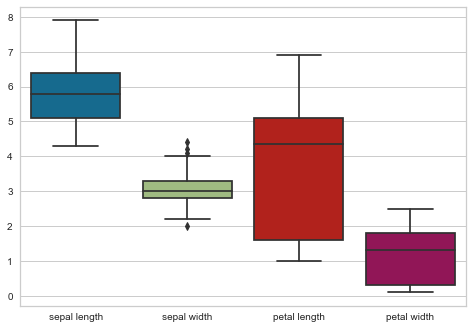

In [70]:
sns.boxplot(data = base1)

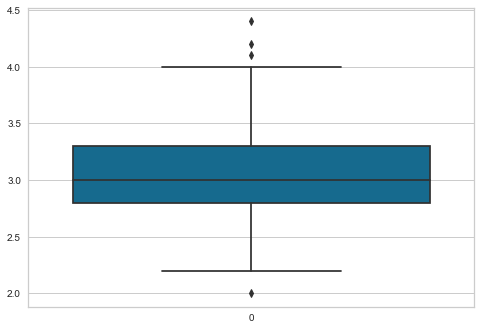

In [71]:
sns.boxplot(data = base1["sepal width"])

## 3.5 - Tratamento de Outliers

## 3.6 - Apagar Colunas

In [ ]:
# Lista todas as colunas
list(base1)

In [ ]:
nome_coluna = base.NomeDaColuna  #salvar essa coluna caso seja necessário
base = base.drop('NomeDaColuna', axis = 1)     #AXIS = 1 APAGA A COLUNA

# 4.0  - EXPLORAÇÃO DOS DADOS

## 4.1 - Visualização de Estatísticas Básicas

In [17]:
base1.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4.2 - Listar Nomes das Colunas (Atributos)

In [53]:
# Lista todas as colunas
list(base1)

['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

## 4.3 - Virificar Distribuição da Classe

In [55]:
# Verificando como os dados estão distribuídos
num_true = len(base5.loc[base5['diabetes'] == True])
num_false = len(base5.loc[base5['diabetes'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

## 4.4 - Correlação

In [27]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(base1, size=5):
    corr = base1.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

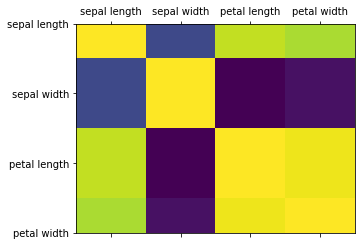

In [28]:
# Criando o gráfico
plot_corr(base1)

In [30]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
base1.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


## 4.5 - Verificar/ Visualizar a  Distribuição/Relação entre os Atributos

In [ ]:
#EXEMPLO UTILIZANDO A BASE 4 - "DADOS PESQUISA"

### 4.5.1 - Distribuição da Idade

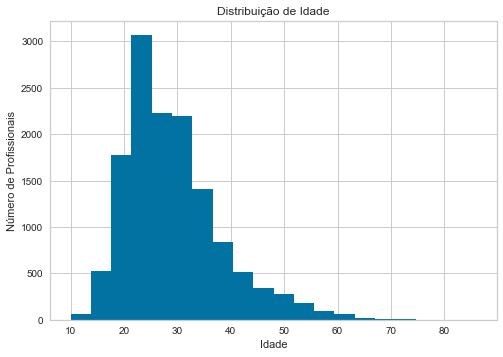

In [22]:
# Qual a distribuição de idade dos participantes da pesquisa?
# A maioria dos profissionais que trabalham como programadores de 
# software estão na faixa de idade entre 20 e 30 anos, sendo 25 anos 
# a idade mais frequente.

# Gerando um histograma
base4.Age.hist(bins = 20) #bins = divisão
plt.xlabel("Idade")
plt.ylabel("Número de Profissionais")
plt.title("Distribuição de Idade")
plt.show()

C:\Users\marcu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\marcu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\marcu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


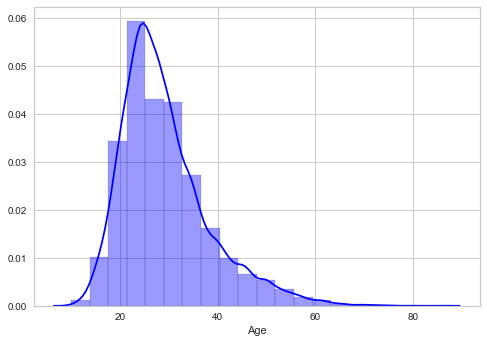

In [25]:
#Densidade

sns.distplot(base4.iloc[:,0], hist = True, kde = True,
             bins = 20, color = 'blue',
             hist_kws={'edgecolor': 'black'})

### 4.5.2 - Distribuição de Sexo

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


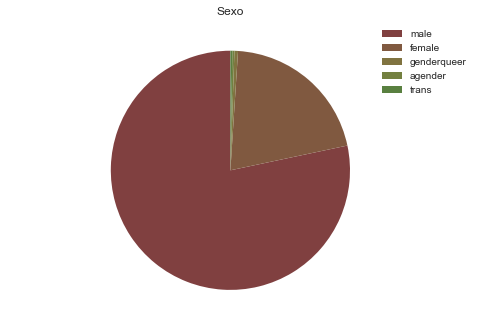

In [28]:
# Qual é a distribuição de sexo dos participantes da pesquisa?
# A grande maioria dos programadores é do sexo masculino

# Definindo a quantidade
labels = base4.Gender.value_counts().index
num = len(base4.EmploymentField.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Pizza ***************************MUDAR PARA BARRA***************************
fatias, texto = plt.pie(base4.Gender.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title("Sexo")
plt.show()

### 4.5.3 - Distribuição de Interesses

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


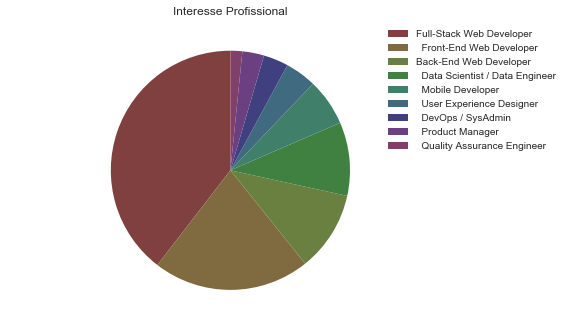

In [29]:
# Quais sãos os principais interesses dos participantes da pesquisa?
# O principal interesse profissional dos programadores é o desenvolvimento web (Full-Stack, Front-End e Back-End), 
# seguido pela área de Data Science.

# Definindo a quantidade
num = len(base4.JobRoleInterest.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = base4.JobRoleInterest.value_counts().index
colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

# Gráfico de Pizza ***************************MUDAR PARA BARRA***************************
fatias, texto = plt.pie(base4.JobRoleInterest.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.25, 1))
plt.title("Interesse Profissional")
plt.show()

### 4.5.4 - Distribuição de Empregabilidade

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


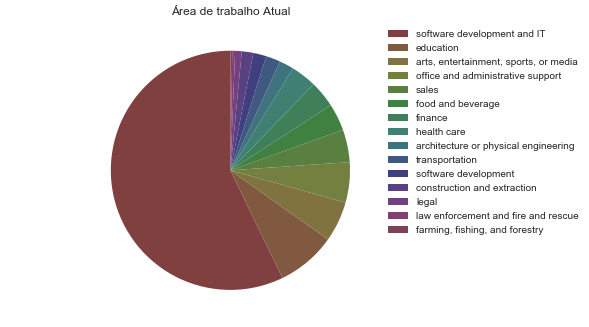

In [30]:
# Quais as áreas de negócio em que os participantes da pesquisa trabalham?
# A maioria dos programadores trabalha na área de desenvolvimento de 
# softwares e TI, mas outras áreas como finanças e saúde também são 
# significativas.

# Definindo a quantidade
num = len(base4.EmploymentField.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = base4.EmploymentField.value_counts().index

# Gráfico de Pizza ***************************MUDAR PARA BARRA***************************
fatias, texto = plt.pie(base4.EmploymentField.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.3, 1))
plt.title("Área de trabalho Atual")
plt.show()

### 4.5.5 - Preferências de Trabalho por Idade

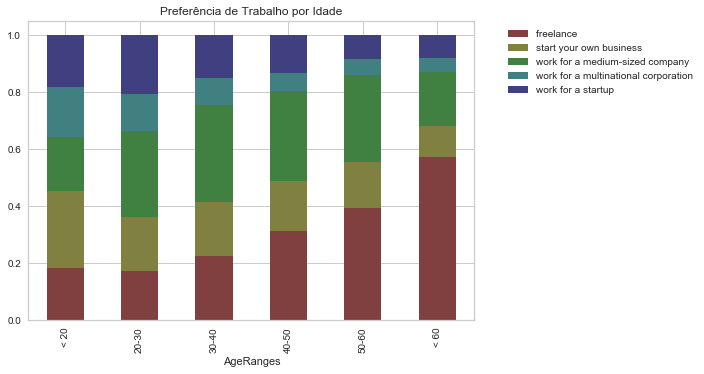

In [31]:
# Quais são as preferências de trabalho por idade?
# Perceba que à medida que a idade aumenta, o interesse por trabalho 
# freelance também aumenta, sendo o modelo preferido por profissionais 
# acima de 60 anos. Profissionais mais jovens preferem trabalhar em 
# Startups ou no seu próprio negócio. Profissionais entre 20 e 50 anos 
# preferem trabalhar em empresas de tamanho médio.

# Agrupando os dados
base4_ageranges = base4.copy()
bins=[0, 20, 30, 40, 50, 60, 100]

base4_ageranges['AgeRanges'] = pd.cut(base4_ageranges['Age'], 
                                   bins, 
                                   labels=["< 20", "20-30", "30-40", "40-50", "50-60", "< 60"]) 

base4_2 = pd.crosstab(base4_ageranges.AgeRanges, 
                  base4_ageranges.JobPref).apply(lambda r: r/r.sum(), axis=1)

# Definindo a quantidade
num = len(base4_ageranges.AgeRanges.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Barras (Stacked)
ax1 = base4_2.plot(kind = "bar", stacked = True, color = listaRGB, title = "Preferência de Trabalho por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))

### 4.5.6 - Realocação por Idade

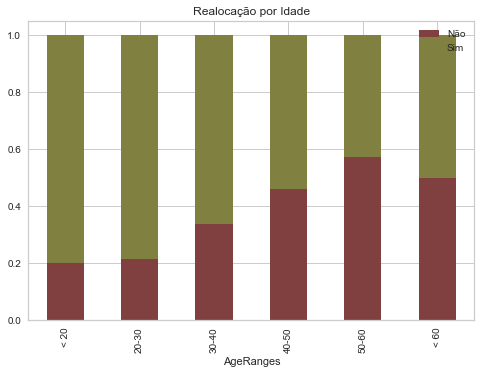

In [32]:
# Qual o objetivo de realocação?
# A vontade de buscar um novo emprego diminui com a idade. 
# Quase 80% das pessoas abaixo dos 30 anos estão preparadas para isso.

# Agrupando os dados
base4_3 = pd.crosstab(base4_ageranges.AgeRanges, 
                  base4_ageranges.JobRelocateYesNo).apply(lambda r: r/r.sum(), axis = 1)

# Definindo a quantidade
num = len(base4_ageranges.AgeRanges.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Barras (Stacked)
ax1 = base4_3.plot(kind = "bar", stacked = True, color = listaRGB, title = "Realocação por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,["Não", "Sim"], loc = 'best')

### 4.5.7 - Idade x Horas de Aprendizagem

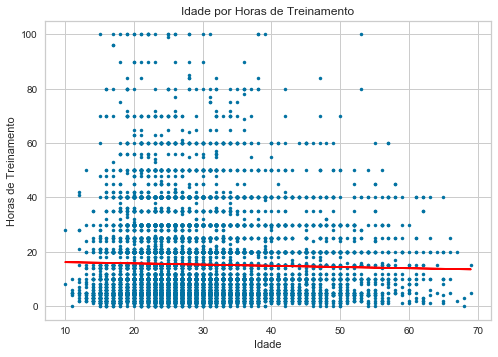

In [33]:
# Qual a relação entre idade e horas de aprendizagem?
# A idade dos profissionais não afeta a quantidade de tempo gasto com capacitação e treinamento.

import warnings
warnings.filterwarnings('ignore')

# Criando subset dos dados
base4_4 = base4.copy()
base4_4 = base4_4.dropna(subset=["HoursLearning"])
base4_4 = base4_4[base4['Age'].isin(range(0,70))]

# Definindo os valores de x e y
x = base4_4.Age
y = base4_4.HoursLearning

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Horas de Treinamento")
plt.title("Idade por Horas de Treinamento")
plt.show()

### 4.5.8 - Investimento em Capacitação x Expectativa Salarial

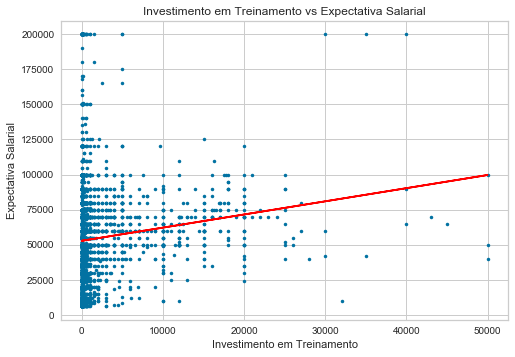

In [35]:
# Qual a relação entre investimento em capacitação e expectativa salarial?
# Os profissionais que investem tempo e dinheiro em capacitação e 
# treinamento, em geral, conseguem salários mais altos, embora alguns 
# profisisonais esperem altos salários, investindo 0 em treinamento.

import warnings
warnings.filterwarnings('ignore')

# Criando subset dos dados
base4_5 = base4.copy()
base4_5 = base4_5.dropna(subset=["ExpectedEarning"])
base4_5 = base4_5[base4['MoneyForLearning'].isin(range(0,60000))]

# Definindo os valores de x e y
x = base4_5.MoneyForLearning
y = base4_5.ExpectedEarning

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Investimento em Treinamento")
plt.ylabel("Expectativa Salarial")
plt.title("Investimento em Treinamento vs Expectativa Salarial")
plt.show()

## Disperssão

Text(0, 0.5, 'Circunferência')

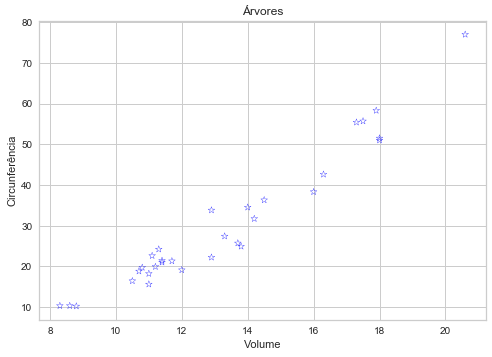

In [43]:
#base7

plt.scatter(base7.Girth, base7.Volume, color = 'blue', facecolors = 'none', marker = '*')
plt.title('Árvores')
plt.xlabel('Volume')
plt.ylabel('Circunferência')

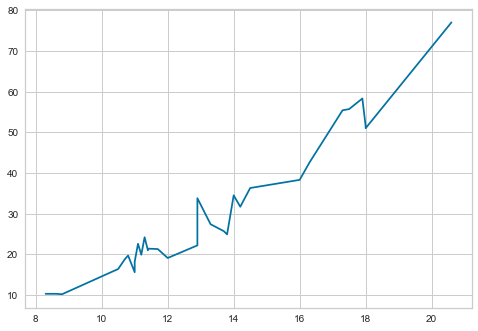

In [45]:
plt.plot(base7.Girth, base7.Volume)

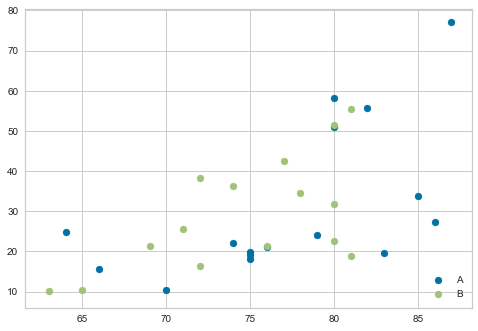

In [62]:
#CRIANDO NOVA COLUNA PARA EXEMPLO
base7.shape
tipos = np.random.choice(a=["A","B"],size = 31,replace=True, p = [0.4,0.6])
base7_2 =  base7
base7_2['tipos'] = tipos

#PEGANDO OS TIPOS DE CATEGORIAS
unicos = list(set(base7_2.tipos))

#GERANDO O GRAFICO
for i in range(len(unicos)):
    indice = base7_2.tipos == unicos[i]
    plt.scatter(base7_2.Height[indice], base7_2.Volume[indice], label = unicos[i])
plt.legend(loc = 'lower right')

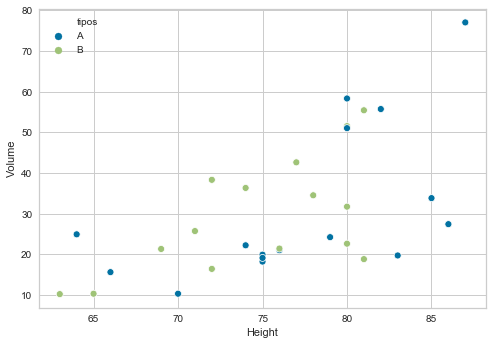

In [65]:
#USANDO SEABORN
sns.scatterplot(base7_2.Height, base7_2.Volume, hue = base7_2.tipos)

## PLOTAR MAIS DE UM GRAFICO JUNTO

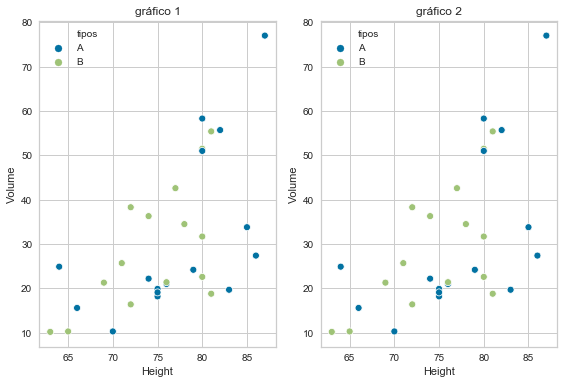

In [67]:
plt.figure(1)
plt.subplot(1,2,1)#linhas, colunas, nºdo grafico
sns.scatterplot(base7_2.Height, base7_2.Volume, hue = base7_2.tipos).set_title('gráfico 1')
plt.subplot(1,2,2)
sns.scatterplot(base7_2.Height, base7_2.Volume, hue = base7_2.tipos).set_title('gráfico 2')
plt.tight_layout()

# 5.0 - MODELAGEM DOS DADOS

In [ ]:
base1['class'].value_counts() #contagem do atributo class

In [ ]:
#Remover coluna da base de dados
base = base.drop('dateCrawled', axis = 1) #axis =1 significa a coluna toda

In [ ]:
#SEPARA EM ATRIBUTOS E CLASSES
previsores = base6.iloc[:,0:20].values   #.values converte para valores numpy
classe = base6.iloc[:,20].values         #.values converte para valores numpy

#outros exemplos (regressão)
previsores = base.iloc[:, [0,1,2,3,7,8,9,10,11]].values
venda_na = base.iloc[:, 4].values   #Saídas
venda_eu = base.iloc[:, 5].values   #Saídas
venda_jp = base.iloc[:, 6].values   #Saídas

In [ ]:
#transformar atributos categoricos para numericos

labelEncoder = LabelEncoder() 
previsores[:,0] = labelEncoder.fit_transform(previsores[:,0])
previsores[:,1] = labelEncoder.fit_transform(previsores[:,1])
previsores[:,3] = labelEncoder.fit_transform(previsores[:,3])
previsores[:,5] = labelEncoder.fit_transform(previsores[:,5])
previsores[:,8] = labelEncoder.fit_transform(previsores[:,8])
previsores[:,9] = labelEncoder.fit_transform(previsores[:,9])
previsores[:,10] = labelEncoder.fit_transform(previsores[:,10])

# 0 0 0 4
# 2 0 1 0
# 3 0 0 1

In [ ]:
#Atributos  -- DUMMY

onehotencoder = OneHotEncoder(categorical_features = [0,1,3,5,8,9,10])
previsores = onehotencoder.fit_transform(previsores).toarray()

#Gera varius outros atributos com essas caracteristicas
#atr 1  1 0 0
#atr 2  0 1 0
#atr 3  0 0 1

In [ ]:
# Definindo as classes BINARIAS ESTANDO CATEGORICA(NESSE CASO BOOL)
diabetes_map = {True : 1, False : 0}
# Aplicando o mapeamento ao dataset
df['diabetes'] = df['diabetes'].map(diabetes_map)
# Verificando as primeiras linhas do dataset
df.head(5)

In [ ]:
#CONVERTER  AS SAIDAS CATEGORICAS PARA NUMERICAS - KERAS
labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(classe) #TANSFORMA EM NUMEROS 1 2 3
classe_dummy = np_utils.to_categorical(classe) #TRANSFORMA EM BINARIOS 
# iris setosa     1 0 0
# iris virginica  0 1 0
# iris versicolor 0 0 1

In [ ]:
#NORMALIZADOR DE VARIAVEIS
normalizador = MinMaxScaler(feature_range=(0,1)) #NORMALIZAÇÃO DOS VALORES 
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento) #base_treinamento é a base de dados

#USADO PARA FAZER PREVISÃO
entradas = normalizador.transform(entradas) #NAO USA O FIT_TRANSFORM POIS QUERO USAR A MESMA NORMALIZAÇÃO
#USADO PARA VISUALIZAR OS DADOS SEM A NORMALIZAÇÃO
previsoes = normalizador.inverse_transform(previsoes) #REMOBVER A NORMALIZAÇÃO

In [ ]:
#DIVIDIR DADOS EM TREINAMENTO E TESTE

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

#y sao as saidas
#x sao as entradas

### Tratamento para Imagens

In [ ]:
#BASE MNIST
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0],28, 28, 1)        #shape[0] = 60000 ||(60000,28,28)
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)                         # 28,28,1 -> 28x28 com 1 canal

In [ ]:
previsores_treinamento = previsores_treinamento.astype('float32') #mudar para float
previsores_teste = previsores_teste.astype('float32') #mudar para float

In [ ]:
previsores_treinamento /= 255 #normalização entre 0 e 1
previsores_teste /= 255

In [ ]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10) #dummy
classe_teste = np_utils.to_categorical(y_teste, 10) #dummy

In [ ]:
#TRANSFORMAR DATAFRAME EM LISTA DE LISTAS --> REGRAS DE ASSOCIAÇÃO
transacao = []
for i in range(0,6):
    transacao.append([str(dados.values[i,j])for j in range(0,3)]) 

# 6.0 - MODELOS

## 6.1 - Apredizagem Supervisionada

### Regressão

In [ ]:
# Criando o modelo regressor usando KERAS

regressor = Sequential()

regressor.add(Dense(units = 158, activation = 'relu', input_dim = 316))

regressor.add(Dense(units = 158, activation = 'relu'))

regressor.add(Dense(units = 1, activation = 'linear'))

In [ ]:
#Compilar modelo

regressor.compile(loss = 'mean_absolute_error', 
                  optimizer = 'adam',
                  metrics = ['mean_absolute_error'])

In [ ]:
#Treinar modelo

regressor.fit(previsores, preco_real, batch_size = 300, epochs = 100) #preco_real é a variavel que queremos prever

In [ ]:
previsoes = regressor.predict(previsores)
print(preco_real.mean())
print(previsoes.mean())

###### Avaliação 

###  *** Regressão  COM VALIDAÇÃO CRUZADA

In [ ]:
# Criando o modelo regressor usando KERAS

def criar_rede():
    regressor = Sequential()
    regressor.add(Dense(units = 158, activation = 'relu', input_dim = 316))
    
    regressor.add(Dense(units = 158, activation = 'relu'))
    
    regressor.add(Dense(units = 1, activation = 'linear'))
    
    regressor.compile(loss = 'mean_absolute_error', 
                      optimizer = 'adam',
                      metrics = ['mean_absolute_error'])
    
    return regressor

In [ ]:
regressor = KerasRegressor(build_fn = criar_rede,
                           epochs = 100,
                           batch_size = 300)

In [ ]:
resultados = cross_val_score(estimator = regressor,
                             X = previsores, 
                             y = preco_real,
                             cv = 10, 
                             scoring = 'neg_mean_absolute_error')

##### Avaliação 

In [ ]:
media = resultados.mean()
desvio = resultados.std()
print(media)
print(desvio)

#### TUNING DOS PARAMENTROS

In [ ]:
def criarRede(optimizer, loos,):
    
    regressor = Sequential()
    
    regressor.add(Dense(units = 158, activation = 'relu', input_dim = 316))
    regressor.add(Dropout(0.2))
    
    regressor.add(Dense(units = 158, activation =  'relu'))
    regressor.add(Dropout(0.2))
    
    regressor.add(Dense(units = 1, activation = 'linear'))
    
    regressor.compile(optimizer = optimizer, 
                      loss = loos,
                      metrics = ['mean_absolute_error'])
    return regressor

# Não é necessário alterar o parâmetro metrics pois ele é usado somente para 
# mostrar o resultado e de fato ele não é utilizado no treinamento da rede neural

In [ ]:
regressor = KerasRegressor(build_fn = criarRede)

In [ ]:
parametros = {'optimizer': ['adam'],
              'loos': ['mean_squared_error' , 'mean_absolute_error' , 'mean_absolute_percentage_error' , 'mean_squared_logarithmic_error'],
              }

In [ ]:
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parametros,
                           cv = 2)

In [ ]:
grid_search = grid_search.fit(previsores, preco_real, epochs = 1000, batch_size = 500)

In [ ]:
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_

print(melhores_parametros)
print(melhor_precisao)

###  *** Regressão  Multiplas saídas

In [ ]:
#NOVA FORMA DE CONSTRUIR UMA REDE NEURAL COM KERAS -- SEM USAR O Sequential()
camada_entrada = Input(shape=(61,))
camada_oculta1 = Dense(units = 32, activation = 'sigmoid')(camada_entrada)
camada_oculta2 = Dense(units = 32, activation = 'sigmoid')(camada_oculta1)
camada_saida1 = Dense(units = 1, activation = 'linear')(camada_oculta2)
camada_saida2 = Dense(units = 1, activation = 'linear')(camada_oculta2)
camada_saida3 = Dense(units = 1, activation = 'linear')(camada_oculta2)

In [ ]:
regressor = Model(inputs = camada_entrada,
                  outputs = [camada_saida1, camada_saida2, camada_saida3])

In [ ]:
regressor.compile(optimizer = 'adam',
                  loss = 'mse')

In [ ]:
regressor.fit(previsores, 
              [venda_na, venda_eu, venda_jp], #As 3 saídas
              epochs = 5000, 
              batch_size = 100)

In [ ]:
previsao_na, previsao_eu, previsao_jp = regressor.predict(previsores)
print(previsao_na[0])
print(previsao_eu[0])
print(previsao_jp[0])

In [ ]:
print(venda_na[0])
print(venda_eu[0])
print(venda_jp[0])

### Classificação

#### *** Naive Bayes

In [ ]:
# Criando o modelo preditivo usando SCIKIT-LEARN
modelo_nb1 = GaussianNB()

In [ ]:
# Treinando o modelo
modelo_nb1.fit(X_treino, Y_treino.ravel())

##### Verificando a exatidão no modelo nos dados de teste

In [ ]:
nb1_predict_train = modelo_nb1.predict(X_teste)

In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

##### Matriz de Confusão

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

####  *** Random Forest Classifier

In [ ]:
# Criando o modelo preditivo usando SCIKIT-LEARN
modelo_rfc1 = RandomForestClassifier(random_state = 42)

# Treinando o modelo
modelo_rfc1.fit(X_treino, Y_treino.ravel())

##### Verificando a exatidão no modelo nos dados de teste

In [ ]:
# Verificando nos dados de teste
rfc_predict_test = modelo_rfc1.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rfc_predict_test)))
print()

##### Matriz de Confusão

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rfc_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rfc_predict_test, labels = [1, 0]))

In [ ]:
#Estimadores do Modelo
modelo_rfc1.estimators_[1]

####  *** Regressão Logística

In [ ]:
# Criando o modelo preditivo usando SCIKIT-LEARN
modelo_rl1 = LogisticRegression(C = 0.7, random_state = 42)

# Treinando o modelo
modelo_rl1.fit(X_treino, Y_treino.ravel())

##### Verificando a exatidão no modelo nos dados de teste

In [ ]:
# Verificando nos dados de teste
rl1_predict_test = modelo_v3.predict(X_teste)

In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rl1_predict_test)))
print()

##### Matriz de Confusão

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rl1_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rl1_predict_test, labels = [1, 0]))

####  *** Aprendizado por instância (KNN)

In [ ]:
# Criando o modelo preditivo usando SCIKIT-LEARN
modelo_knn1 = KNeighborsClassifier(n_neighbors = 3)

# Treinando o modelo
modelo_knn1.fit(x_treinamento, y_treinamento)

In [ ]:
previsao = modelo_knn1.predict(x_teste)
previsao

##### Verificando a exatidão no modelo nos dados de teste

In [ ]:
taxa_acerto = accuracy_score(y_teste, previsao)
taxa_erro = 1 - taxa_acerto
taxa_acerto

##### Matriz de Confusão

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")
confusao = confusion_matrix(y_teste, previsao)
confusao

#### *** Árvore de Decisão

In [ ]:
# Criando o modelo preditivo usando SCIKIT-LEARN
modelo_arvore = DecisionTreeClassifier()

# Treinando o modelo
modelo_arvore.fit(x_treinamento,y_treinamento)

In [ ]:
export_graphviz(modelo_arvore, out_file = 'tree.dot')
#gera um arquivo na raiz. Copiar o que esta neste arquivo e colar nese site: www.graphvoz.com  para gerar o desenho da arvore

In [ ]:
previsao = modelo_arvore.predict(x_teste)
previsao

##### Verificando a exatidão no modelo nos dados de teste

In [ ]:
taxa_acerto = accuracy_score(y_teste, previsao)
taxa_erro = 1 - taxa_acerto
taxa_acerto

##### Matriz de Confusão

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")
confusao = confusion_matrix(y_teste, previsao)
confusao

####  *** SVM

In [ ]:
# Criando o modelo preditivo usando SCIKIT-LEARN
svm = SVC()

# Treinando o modelo
svm.fit(x_treinamento, y_treinamento)

In [ ]:
previsao = svm.predict(x_teste)

##### Verificando a exatidão no modelo nos dados de teste

In [ ]:
taxa_acerto = accuracy_score(y_teste, previsao)
taxa_acerto

##### Matriz de Confusão

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")
confusao = confusion_matrix(y_teste, previsao)
confusao

### 6.1.2 -  REDES NEURAIS 

####  *** RNA - Redes Neurais Artificiais

In [ ]:
# Criando o modelo preditivo usando KERAS
modelo = Sequential()  #uma camada apos a outra

modelo.add(Dense(units = 5, activation = 'relu', input_dim = 4)) #5 camadas ocultas + 4 entrada
modelo.add(Dropout(0.2))

modelo.add(Dense(units = 4,  activation = 'relu'))# camada de oculta 2
modelo.add(Dropout(0.2))

modelo.add(Dense(units = 3, activation = 'softmax')) #camada de saida

In [ ]:
#softmax -> Classificação Categórica
#sigmoid - >Classificação Binária

##### Ver Modelo

In [ ]:
modelo.summary()

##### Compilar Modelo


In [ ]:
#Classificação Binária
classificador.compile(optimizer = 'adam', 
                      loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])

In [ ]:
#Classificação Categórica
modelo.compile(optimizer = 'adam', 
               loss = 'categorical_crossentropy', 
               metrics = ['accuracy'])

##### Treinar Modelo


In [ ]:
historico = modelo.fit(X_treinamento, 
                       y_treinamento, 
                       epochs = 1000, 
                       validation_data = (X_teste, y_teste))

##### Plotar imagens do treino


In [ ]:
historico.history.keys()
plt.plot(historico.history['val_loss'])

In [ ]:
plt.plot(historico.history['val_accuracy'])

##### Predição

In [ ]:
previsoes = modelo.predict(X_teste)
previsoes = (previsoes > 0.5)
previsoes

##### Avaliação 

In [ ]:
precisao = accuracy_score(classe_teste, previsoes)
precisao

In [ ]:
resultado = classificador.evaluate(previsores_teste, classe_teste)#usando ferramentas do keras
resultado

In [ ]:
#Matriz de Confusão MULTICLASSE ... Executar essa parte 1º
y_teste_matrix = [np.argmax(t) for t in y_teste]              #RETORNA O INDICE QUE ESTA TRUE (DA RESPOSTA CERTA)
y_previsao_matrix = [np.argmax(t) for t in previsoes]         #RETORNA O INDICE QUE ESTA TRUE (DA RESPOSTA CERTA)

#Binária e Multiclasse
matriz = confusion_matrix(y_teste_matrix, y_previsao_matrix)  #classe teste, previsões
matriz

####  *** RNA  COM VALIDAÇÃO CRUZADA

In [ ]:
def criarRede():
    
    classificador = Sequential()
    
    classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 30))    
    classificador.add(Dropout(0.2))
    
    classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'))
    classificador.add(Dropout(0.2))
    
    classificador.add(Dense(units = 1, activation = 'sigmoid'))
    
    otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
    
    classificador.compile(optimizer = otimizador, 
                          loss = 'binary_crossentropy',
                          metrics = ['binary_accuracy'])
    
    return classificador

In [ ]:
classificador = KerasClassifier(build_fn = criarRede, epochs = 50, batch_size = 10)

##### Ver Modelo


In [ ]:
modelo.summary()

##### Treinar Modelo


In [ ]:
resultados = cross_val_score(estimator = classificador, 
                             X = previsores, 
                             y = classe, 
                             cv = 10, 
                             scoring = 'accuracy')

In [ ]:
resultados

##### Avaliação 

In [ ]:
media = resultados.mean()
desvio = resultados.std()
print(media)
print(desvio)

#### TUNING DOS PARAMENTROS

In [ ]:
def criarRede():
    
    classificador = Sequential()
    
    classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 30))    
    classificador.add(Dropout(0.2))
    
    classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'))
    classificador.add(Dropout(0.2))
    
    classificador.add(Dense(units = 1, activation = 'sigmoid'))
    
    otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
    
    classificador.compile(optimizer = otimizador, 
                          loss = 'binary_crossentropy',
                          metrics = ['binary_accuracy'])
    
    return classificador

In [ ]:
classificador = KerasClassifier(build_fn = criarRede)

In [ ]:
parametros = {'batch_size': [10, 30],
              'epochs': [50, 100],
              'optimizer': ['adam', 'sgd'],
              'loos': ['binary_crossentropy', 'hinge'],
              'kernel_initializer': ['random_uniform', 'normal'],
              'activation': ['relu', 'tanh'],
              'neurons': [16, 8]}

In [ ]:
grid_search = GridSearchCV(estimator = classificador,
                           param_grid = parametros,
                           scoring = 'accuracy',
                           cv = 5)

In [ ]:
grid_search = grid_search.fit(previsores, classe)

In [ ]:
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_

In [ ]:
print(melhores_parametros)
print(melhor_precisao)

####  *** CNN - Redes Neurais Convolucionais

In [ ]:
#OPERADOR DE CONVOLUÇÃO -> POOLING ---- CAMDA DE CONVLUÇÃO ->POOLING -> FLATTENING
#PRIMEIRA CAMADA DE CONVLUÇÃO

classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation = 'relu')) #32 ->  Nº DE KERNELS 
#64 É MAIS RECONMENDAVEL E POTENCIAS DE 2: 128 256 512 1024
#(3,3) pois a imagem é pequena 
classificador.add(BatchNormalization()) #NORMALIAÇÃO NOS MAPAS DE CONVLOLUÇÃO
classificador.add(MaxPooling2D(pool_size = (2,2)))#POOLING

In [ ]:
#SEGUNDA CAMADA DE CONVLUÇÃO
classificador.add(Conv2D(32, (3,3), activation = 'relu')) #não possui input shape
classificador.add(BatchNormalization()) # normalização na camada de convolução
classificador.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
#Flatten
classificador.add(Flatten()) #usa somente no final de todas convoluções

In [ ]:
#CAMADA DENSA
classificador.add(Dense(units = 128, activation = 'relu')) #13x13 na entrada(169) camada oculta 128. Valor multiplo de 2
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
classificador.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
classificador.fit(previsores_treinamento, 
                  classe_treinamento,
                  batch_size = 128, 
                  epochs = 2,
                  validation_data = (previsores_teste, classe_teste)) #ja mostra os resultados do teste, val_loss e val_acc

In [ ]:
resultado = classificador.evaluate(previsores_teste, classe_teste)
resultado

####  *** CNN  COM VALIDAÇÃO CRUZADA - KFOLD

 Prepar os dados como anteriormente (MNIST) -- Não usa necessariamento os dados de treinamento e teste

In [ ]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed) #n_splits = 10 (k) usar o seed com outro valor tb
resultados = []

In [ ]:
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape = (classe.shape[0], 1))):
    #np.zeros(shape = (classe.shape[0], 1)) CRIA UMA COLUNA DE ZEROS... VAISER UTLIZADOS OS ÍNDICES
    
    classificador = Sequential()
    classificador.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation = 'relu'))
    classificador.add(MaxPooling2D(pool_size = (2,2)))
    classificador.add(Flatten())
    
    classificador.add(Dense(units = 128, activation = 'relu'))
    classificador.add(Dense(units = 10, activation = 'softmax'))
    
    classificador.compile(loss = 'categorical_crossentropy', 
                          optimizer = 'adam',
                          metrics = ['accuracy'])
    
    classificador.fit(previsores[indice_treinamento], 
                      classe[indice_treinamento],
                      batch_size = 128, epochs = 5)
    
    precisao = classificador.evaluate(previsores[indice_teste], classe[indice_teste])
    resultados.append(precisao[1])#precisao[0] VAL LOSS // precisao[1] VAL ACC


In [ ]:
#media = resultados.mean()
media = sum(resultados) / len(resultados)
media

####  Argumentation - otimizacao - geracao de imagens extras - SEM VALIDAÇÃO CRUZADA

  Prepar os dados como anteriormente (MNIST)

In [4]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation = 'relu'))
classificador.add(MaxPooling2D(pool_size = (2,2)))
classificador.add(Flatten())

In [5]:
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dense(units = 10, activation = 'softmax'))

classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

In [6]:
gerador_treinamento = ImageDataGenerator(rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)

In [7]:
gerador_teste = ImageDataGenerator()

In [8]:
base_treinamento = gerador_treinamento.flow(previsores_treinamento,
                                            classe_treinamento, batch_size = 128)

base_teste = gerador_teste.flow(previsores_teste, classe_teste, batch_size = 128)

In [ ]:
classificador.fit_generator(base_treinamento, 
                            steps_per_epoch = 600000 / 128,  #total de registros / batch_size
                            epochs = 5, 
                            validation_data = base_teste,
                            validation_steps = 10000 / 128)  #total de registros / batch_size

#### *** CNN - LENDO DADOS PELAS PASTAS

In [2]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

In [3]:
classificador.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

In [4]:
classificador.add(Flatten())

In [5]:
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 1, activation = 'sigmoid'))

In [6]:
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255,     #normalização
                                         rotation_range = 7,   #grau de giro
                                         horizontal_flip = True, #giros horizontais
                                         shear_range = 0.2,
                                         height_shift_range = 0.07, #faixa de mudança
                                         zoom_range = 0.2)

gerador_teste = ImageDataGenerator(rescale = 1./255) #normalização

In [8]:
base_treinamento = gerador_treinamento.flow_from_directory('Dados/dataset/training_set', #usar essa estrutura(pastas) para encontrar  
                                                           target_size = (64, 64),       #automaticamente
                                                           batch_size = 32,
                                                           class_mode = 'binary')


Found 4000 images belonging to 2 classes.


In [9]:
base_teste = gerador_teste.flow_from_directory('Dados/dataset/test_set',   #usar essa estrutura(pastas) para encontrar 
                                               target_size = (64, 64),     #automaticamente
                                               batch_size = 32,
                                               class_mode = 'binary')

Found 1000 images belonging to 2 classes.


##### Prever se uma imagem é cachorro ou gato

In [17]:
imagem_teste = image.load_img('Dados/dataset/test_set/cachorro/dog.3500.jpg',target_size = (64,64))#imagem para classificação
#target_size = (64,64) manter o padrao

In [18]:
imagem_teste = image.img_to_array(imagem_teste) #conversao 
imagem_teste /= 255                             #normalização
imagem_teste = np.expand_dims(imagem_teste, axis = 0) #adicionar coluna para ficar do formato do tensorFlow 
#(1,64,64,3)  1->quantidade de imagens(bath)

In [19]:
base_treinamento.class_indices

{'cachorro': 0, 'gato': 1}

In [20]:
previsao = classificador.predict(imagem_teste)
previsao

array([[False]])

In [ ]:
previsao = (previsao > 0.5)#o valor 0.5 é subjetivo
previsao

In [ ]:
if previsao:
    print("Gato")
else:
    print("Cachorro")

####  *** RNN - Redes Neurais Recorrentes

In [4]:
previsores = []
preco_real = []

In [5]:
for i in range(90, 1242):           #90 registros de previsores-> pula 90 para começar prever|| 1242 total de dados
    
    previsores.append(base_treinamento_normalizada[i-90:i, 0]) #pegar os valores antes do 90(iniciando do zero)
    preco_real.append(base_treinamento_normalizada[i, 0]) #valor começa em 90, pois é o 1º a se prever
    
previsores, preco_real = np.array(previsores), np.array(preco_real) #transformar em array numpy
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1)) #formatar para formato do keras
#quantidades de registros(batc size), Time step, Quantidade de atributos previsores

In [6]:
#MODELO REGRESSOR LSTM

regressor = Sequential()

#1ª CAMADA
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))
#units =  quantidadese de memorias
#return_sequences = True -> vai passar a informação para frente
#adicionar muitas camadas 

In [7]:
#2ª CAMADA
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))
#diminuir os units por camada

In [8]:
#3ª CAMADA
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [9]:
#4ª CAMADA
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))
#NAO POSSUI O  return_sequences

In [10]:
#CAMADA DE SAIDA É UMA CAMADA DENSA
regressor.add(Dense(units = 1, activation = 'linear'))

In [11]:
regressor.compile(optimizer = 'rmsprop', 
                  loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
#ADAM TB FUNCIONA
#METRICAS PODE SER O mean_absolute_error PQ É SO PARA VIZUALIZAÇÃO

In [ ]:
#TREINAMENTO
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

In [13]:
#NOVA BASE PARA TESTE
base_teste = pd.read_csv('dados/petr4-teste.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0) #concatenação por coluna
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values #dados de teste -90
entradas = entradas.reshape(-1, 1) #-1 nao altera as linhas // 1 adiciona coluna
entradas = normalizador.transform(entradas) #NAO USA O FIT_TRANSFORM POIS QUERO USAR A MESMA NORMALIZAÇÃO

In [14]:
X_teste = []

In [15]:
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))
previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes) #REMOBVER A NORMALIZAÇÃO

In [16]:
previsoes.mean()
preco_real_teste.mean()
#FIZER UM MENOS OUTR TEMOS A DIFERENÇA EM R$

17.87454563636364

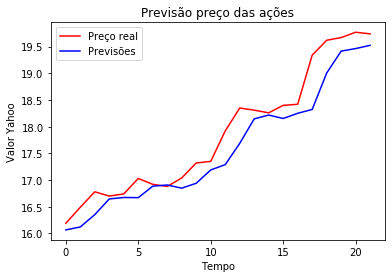

In [17]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()

VERIFICAR CODIGO COM MULTIPLAS ENTRADAS E MULTIPLAS SAIDAS

## 6.2 - Apredizagem NÃO Supervisionada

### 6.2.1 - Clustering

####  *** Agrupamento Fuzzy

In [ ]:
# Criando o modelo preditivo usando SCIKIT-LEARN (skfuzzy)
r = skfuzzy.cmeans(data = iris.data.T, c=3, m=2, error = 0.005, maxiter = 1000, init = None)
#tranpor a matriz de dados||valores default pela documentação
r

In [ ]:
previsao_porcentagem = r[1]
previsao_porcentagem[0][0]
previsao_porcentagem[1][0]
previsao_porcentagem[2][0]
previsao = previsao_porcentagem.argmax(axis = 0)
previsao

###### Matriz de Confusão

In [ ]:
#sabemos os agrupamentos
resultados = confusion_matrix(iris.target, previsao)
resultados

####  ***  Agrupamento Kmeans

In [ ]:
# Criando o modelo preditivo usando SCIKIT-LEARN
cluster = KMeans(n_clusters = 3)

# Treinando o modelo
cluster.fit(iris.data)

In [ ]:
centroide = cluster.cluster_centers_
centroide

In [ ]:
previsoes = cluster.labels_
previsoes

######  Matriz de Confusão

In [ ]:
#sabemos os agrupamentos
resultados = confusion_matrix(iris.target, previsoes)
resultados

####  *** Agrupamento Kmedoids

In [ ]:
# Criando o modelo preditivo usando SCIKIT-LEARN
cluster = kmedoids(iris.data[:,0:2],[3, 12, 20])
cluster.get_medoids()
cluster.process()

In [ ]:
previsao = cluster.get_clusters()
previsao

In [ ]:
medoids = cluster.get_medoids()
medoids

In [ ]:
v = cluster_visualizer()
v.append_clusters(previsao, iris.data[:,0:2])
v.append_cluster(medoids, data = iris.data[:,0:2],marker = '*',markersize = 15)
v.show()

######  Matriz de Confusão

In [ ]:
lista_previsao = []
lista_real = []
for i in range(len(previsao)):
    print('------------')
    print(i)
    print('------------')
    for j in range(len(previsao[i])):
        print(previsao[i][j])
        lista_previsao.append(i)
        lista_real.append(iris.target[previsao[i][j]])

In [ ]:
lista_previsao = np.asarray(lista_previsao)
lista_real = np.asarray(lista_real)

In [ ]:
resultados = confusion_matrix(lista_real, lista_previsao)
resultados

### 6.2.2 - Mapas Auto Organizaveis

In [20]:
#CARREGAR DADOS E SEPARALOS
base = pd.read_csv('dados/vinhos.csv')
X = base.iloc[:,1:14].values
y = base.iloc[:,0].values #AKI ESTÃO AS CLASSES, MAS NAO USAREMOS

In [6]:
#NORMALIZAÇÃO
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

In [7]:
#CRIAÇÃO DA REDE
som = MiniSom(x = 8, #5sqrt(N) =~8  -> 8x8
              y = 8,         
              input_len = 13, 
              sigma = 1.0, #valor do raio
              learning_rate = 0.5, 
              random_seed = 2)

#INICIALIZAÇÃO DOS PESOS
som.random_weights_init(X)
#TREINAMENTO
som.train_random(data = X, num_iteration = 100) #EPOCAS = 100|| 100 é o suficiente para maioria dos casos

In [ ]:
som._weights
#cada valor é um novo ponto(neuronio)

In [ ]:
som._activation_map #VALORES DO MAPA

In [ ]:
q = som.activation_response(X)
q #CADA VEZ QUE O O NEURONIO FOI CONSIDERADO "B M U"

In [ ]:
#BIBLIOTECA pylab
pcolor(som.distance_map().T) #calcula o MID
# MID - mean inter neuron distance
# 1 é a maior distancia por causa da normalização
colorbar() #escla -> qanto menor mais parecido ele é

In [ ]:
w = som.winner(X[2])#qual dos neuronios foi conciderado o BMU do neuronio 2
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']
y[y == 1] = 0 #começa saida 1 entao tem que converter para zero e assim por diante
y[y == 2] = 1
y[y == 3] = 2
w

In [ ]:
for i, x in enumerate(X):
    #print(i)   #indice
    #print(x)   #linha
    w = som.winner(x)
    #print(w)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], #0.5 é para centralizar
         markerfacecolor = 'None', 
         markersize = 10,
         markeredgecolor = color[y[i]], 
         markeredgewidth = 2)

In [ ]:
#JUNTANDO OS GRAFICOS
pcolor(som.distance_map().T) #calcula o MID
# MID - mean inter neuron distance
# 1 é a maior distancia por causa da normalização
colorbar() #escla -> qanto menor mais parecido ele é

w = som.winner(X[2])#qual dos neuronios foi conciderado o BMU do neuronio 2
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']
#y[y == 1] = 0 #começa saida 1 entao tem que converter para zero e assim por diante
#y[y == 2] = 1
#y[y == 3] = 2 #NAO PRESISA ALTERAR DE NOVO, JA FOI FEITO

for i, x in enumerate(X):
    #print(i)   #indice
    #print(x)   #linha
    w = som.winner(x)
    #print(w)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], #0.5 é para centralizar
         markerfacecolor = 'None', 
         markersize = 10,
         markeredgecolor = color[y[i]], 
         markeredgewidth = 2)
#BOLINHA É A CLASSE ZERO
#QUADRADO É A CLASSE UM
#RETANGULO É A CLASSE DOIS

In [ ]:
y

### 6.2.3 - Sistemas de Recomendação

### 6.2.4 - Regras de Associação

## 6.3 -  SÉRIES TEMPORAIS

In [ ]:
regras = apriori(transacao, min_support = 0.5, min_confiance = 0.5)
print(regras)

In [ ]:
resultados = list(regras)
resultados

In [ ]:
resultados2 = [list(x) for x in resultados]
resultados2

In [ ]:
resultados3 = []
for j in range(0,7):
    resultados3.append([list(x) for x in resultados2[j][2]])
resultados3

# 7.0 - SALVAR E CARREGAR MODELO TREINADO

## 7.1 - Salvando o Modelo

### USANDO PICKLE

In [ ]:
filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_nb1, open(filename, 'wb'))

### USANDO JSON

In [ ]:
#salvar rede neural
classificador_json = classificador.to_json()
with open('classificador.json', 'w') as json_file:
    json_file.write(classificador_json)
classificador.save_weights('classificador.h5')

## 7.2- Carregando o Modelo

### USANDO PICKLE

In [ ]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1, -1))
print(resultado1)
print(resultado2)

### USANDO JSON

In [ ]:
#carregar rede neural
from keras.models import model_from_json

In [ ]:
#carregar rede neural
arquivo = open('classificador_breast.json', 'r')
estrutura_rede = arquivo.read()
arquivo.close()
classificador = model_from_json(estrutura_rede)
classificador.load_weights('classificador_breast.h5')

## 7.3- Teste do Modelo Carregado

In [ ]:
novo = np.array([[15.80, 8.34, 118, 900, 0.10, 0.26, 0.08, 0.134, 0.178,
                  0.20, 0.05, 1098, 0.87, 4500, 145.2, 0.005, 0.04, 0.05, 0.015,
                  0.03, 0.007, 23.15, 16.64, 178.5, 2018, 0.14, 0.185,
                  0.84, 158, 0.363]])
previsao = classificador.predict(novo)
previsao = (previsao > 0.5)

In [ ]:
#verificacao de loss e accuracy
entradas = 'Dados/entradas-breast.csv' #usar os dados do treinamento
saidas = 'Dados/saidas-breast.csv' #usar os dados do treinamento

previsores = pd.read_csv(entradas)
classe = pd.read_csv(saidas)

classificador.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

resultado = classificador.evaluate(previsores, classe)
resultado